In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()

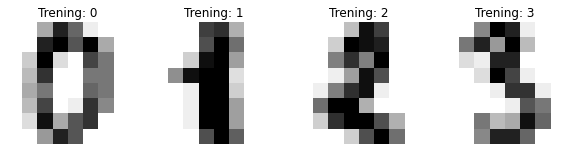

In [3]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,digits.images,digits.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title(f"Trening: {label}")

In [5]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))

In [6]:
#stworzenie klasyfikatora
clf = svm.SVC(gamma=0.001)
X_train,X_test,y_train,y_test = train_test_split(data,digits.target, test_size=0.5, shuffle=False)

In [7]:
#trenowanie zbioru train - uczenie się
clf.fit(X_train,y_train)

SVC(gamma=0.001)

In [8]:
predicted = clf.predict(X_test)

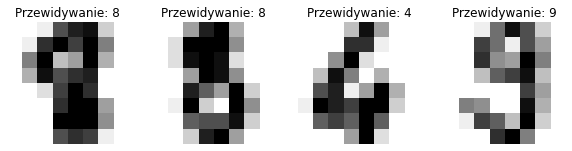

In [9]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,pred in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title(f"Przewidywanie: {pred}")

In [10]:
print(f"Raport klasyfikacyjny dla SVM {clf}:\n {metrics.classification_report(y_test,predicted)}")

Raport klasyfikacyjny dla SVM SVC(gamma=0.001):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Macierz błędów:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


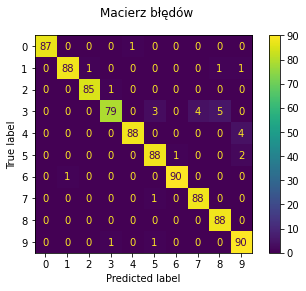

In [11]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Macierz błędów")
print(f"Macierz błędów:\n{disp.confusion_matrix}")
plt.show()